### Criação das bolinhas

C:\Users\BARBAR~1\AppData\Local\Temp/ipykernel_26124/3368662473.py:93: RuntimeWarning: invalid value encountered in double_scalars
  u1 = v1 - 2*m2/M *(np.dot(v1-v2,r1-r2)/d)* (r1-r2)
C:\Users\BARBAR~1\AppData\Local\Temp/ipykernel_26124/3368662473.py:94: RuntimeWarning: invalid value encountered in double_scalars
  u2 = v2 - 2*m1/M * np.dot(v2-v1,r2-r1)/d * (r2-r1)


ValueError: The 'color' keyword argument must have one color per dataset, but 50 datasets and 1 colors were provided

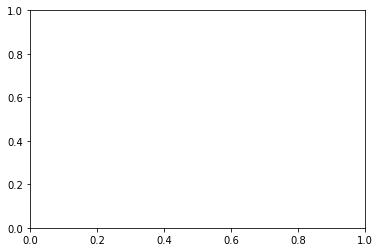

In [5]:
import numpy as np
import pygame
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Inicialização do pygame
pygame.init()

# Parâmetros
num_atoms = 50
temperatura = 8 # em Kelvin
raio = 10
massa = 20

# Parâmetros da janela
width, height = 800, 600
window = pygame.display.set_mode((width, height))
pygame.display.set_caption("Simulação da Colisão Elástica")

# Cores
white = (255, 255, 255)
red = (255, 0, 0)

### Preciso definir as bolinhas, quem são e como serão representadas

## Tem uma velocidade no eixo x, velocidade no eixo y, posição inicial em x e posição inicial em y

## Vamos fazer a representação das bolinhas utilizando matrizes do numpy, preenchida com zeros e 1, sendo 1 a representação dela
class atomo:
    """Essa classe irá representar os nossos átomos,
    
    Terá a posição inicial deles, sua velocidade em x e y, e o seu raio."""
    
    def __init__(self,x,y,vx,vy, raio =0.2,syles=None):
        '''definindo como que cada parâmetro irá se inicializar'''
    
        #Para gerar os valores aleatórios vamos utilizar uma função do numpy chamda random uniform que gera valores aleatórios seguindo 
        ## um intervalo de valores específicado
        
        self.p = np.array((x,y)) #defino a posição das bolinhas
        vx = np.random.uniform(1,5)
        vy = np.random.uniform(1,5)
        self.v = np.array((vx,vy))
        self.direction = random.uniform(0, 2*math.pi)
        self.caract = np.array((temperatura,massa,raio)) #Definindo características das bolinhas

      
    # Movimento das bolinhas
    
    def movimento(self):
    
        direcao = np.array((math.cos(self.direction),math.sin(self.direction)))
        self.p = (self.p + (self.v * direcao)).astype(np.int32) #definimos dessa forma a posição de deslocamento inicial das bolinhas

        #Restringir a região das bolinhas

        self.p[0] = max(self.caract[2], min(self.p[0], width - self.caract[2]))
        self.p[1] = max(self.caract[2], min(self.p[1], height - self.caract[2]))
        
    #Verificando se há colisão entre elas
    
    def verifica_colisao(self,b2):
        distance = math.sqrt((self.p[0] - b2.p[0])**2 + (self.p[1] - b2.p[1])**2)
        return distance <= self.caract[2] + b2.caract[2]
       
    def aplica_colisao(self,b2):
        
        dx = b2.p[0] - self.p[0]
        dy = b2.p[1] - self.p[1]
        
        distancia = math.sqrt(dx**2 + dy**2)
        
        if distancia < self.caract[2] + b2.caract[2]:
            distancia = self.caract[2] + b2.caract[2]
    
        angulo = math.atan2(b2.p[1] - self.p[1], b2.p[0] - self.p[0])
        self_direcao = self.direction
        b2_direcao = b2.direction
        
        self.direction=angulo+ (angulo- self_direcao)  #Atualizar direção
        b2.direction=angulo+ (angulo- b2_direcao)
    
    def mudar_velocidades(self,b2):
        
        m1,m2 = self.caract[2]**2,b2.caract[2]**2
        M = m1 + m2
        r1,r2 = self.p, b2.p
        d = np.linalg.norm(r1-r2)**2
        v1, v2 = self.v, b2.v
        u1 = v1 - 2*m2/M *(np.dot(v1-v2,r1-r2)/d)* (r1-r2)
        u2 = v2 - 2*m1/M * np.dot(v2-v1,r2-r1)/d * (r2-r1)
        self.v = u1
        b2.v = u2
  

        
    
    def colisao_parede(self):
        # Refletir a direção da bola quando colide com as paredes
        if (self.p - self.caract[2] <= 0).any() or (self.p + self.caract[2] >= width).any():
            self.direction = -self.direction
            
 
#lista de atomos

atomos = []

for _ in range(num_atoms):
    valid_position = False
    while not valid_position:
        x = random.randint(50, width - 50)
        y = random.randint(50, height - 50)
        
        #a = atom.p
        
        # Verificar se a posição não está muito próxima de outras posições já escolhidas
        if all(math.sqrt((x-atom.p[0])**2 + (y - atom.p[1])**2) >= 3 * atom.caract[2] for atom in atomos):
            if all(math.sqrt((x - atom.p[0])**2 + (y - atom.p[1])**2) >= 3 * atom.caract[2] for atom in atomos):
                valid_position = True

    atom = atomo(x, y, raio, temperatura, massa)
    atomos.append(atom)
    
# Loop principal
running = True
clock = pygame.time.Clock()

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    window.fill(white)

    for atom in atomos:
        atom.movimento()
        atom.colisao_parede()
        pygame.draw.circle(window, red, (int(atom.p[0]), int(atom.p[1])), atom.caract[2])

    # Verificar colisões
    for i in range(len(atomos)):
        for j in range(i + 1, len(atomos)):
            if atomos[i].verifica_colisao(atomos[j]):
                atomos[i].aplica_colisao(atomos[j])
                atomos[i].mudar_velocidades(atomos[j])

    pygame.display.flip()
    clock.tick(200)
    
# Coletar as velocidades das partículas ao longo do tempo
velocities = []
for atomo in atomos:
    velocities.append(atomo.v)

# Criar um histograma das velocidades
plt.figure()
plt.hist(velocities, bins=80, density=True, alpha=0.4, color='blue')

# Ajustar os dados a uma distribuição gaussiana usando a função norm.fit()
mu, sigma = norm.fit(velocities)

# Calcular a distribuição gaussiana ajustada
x = np.linspace(min(velocities), max(velocities), 100)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, color='red', linewidth=2)

plt.xlabel('Velocidade')
plt.ylabel('Frequência')
plt.title('Histograma de Velocidades')
plt.show()




pygame.quit()
        

### Movimento das bolinhas

In [ ]:
import numpy as np
import pygame
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Inicialização do pygame
pygame.init()

# Parâmetros
num_atoms = 50
temperatura = 8 # em Kelvin
raio = 10
massa = 20

# Parâmetros da janela
width, height = 800, 600
window = pygame.display.set_mode((width, height))
pygame.display.set_caption("Simulação da Colisão Elástica")

# Cores
white = (255, 255, 255)
red = (255, 0, 0)

### Preciso definir as bolinhas, quem são e como serão representadas

## Tem uma velocidade no eixo x, velocidade no eixo y, posição inicial em x e posição inicial em y

## Vamos fazer a representação das bolinhas utilizando matrizes do numpy, preenchida com zeros e 1, sendo 1 a representação dela
class atomo:
    """Essa classe irá representar os nossos átomos,
    
    Terá a posição inicial deles, sua velocidade em x e y, e o seu raio."""
    
    def __init__(self,x,y,vx,vy, raio =0.2,syles=None):
        '''definindo como que cada parâmetro irá se inicializar'''
    
        #Para gerar os valores aleatórios vamos utilizar uma função do numpy chamda random uniform que gera valores aleatórios seguindo 
        ## um intervalo de valores específicado
        
        self.p = np.array((x,y)) #defino a posição das bolinhas
        vx = np.random.uniform(5,50)
        vy = np.random.uniform(5,50)
        self.v = np.array((vx,vy))
        self.direction = random.uniform(0, 2*math.pi)
        self.caract = np.array((temperatura,massa,raio)) #Definindo características das bolinhas
        
    def overlaps(self, b2):
        """Does the circle of this Particle overlap that of other?"""

        return np.hypot(*(self.p - b2.p)) < self.caract[2] + b2.caract[2]


      
    # Movimento das bolinhas
    
    def movimento(self):
    
        direcao = np.array((math.cos(self.direction),math.sin(self.direction)))
        self.p = (self.p + (self.v * direcao)).astype(np.int32) #definimos dessa forma a posição de deslocamento inicial das bolinhas

        #Restringir a região das bolinhas

        self.p[0] = max(self.caract[2], min(self.p[0], width - self.caract[2]))
        self.p[1] = max(self.caract[2], min(self.p[1], height - self.caract[2]))
        
    #Verificando se há colisão entre elas
    
    def verifica_colisao(self,b2):
        distance = math.sqrt((self.p[0] - b2.p[0])**2 + (self.p[1] - b2.p[1])**2)
        return distance <= self.caract[2] + b2.caract[2]
       
    def aplica_colisao(self,b2):
        
        dx = b2.p[0] - self.p[0]
        dy = b2.p[1] - self.p[1]
        
        distancia = math.sqrt(dx**2 + dy**2)
        
        if distancia == 0:
            distancia = self.caract[2] + b2.caract[2]
    
        angulo = math.atan2(b2.p[1] - self.p[1], b2.p[0] - self.p[0])
        self_direcao = self.direction
        b2_direcao = b2.direction
        
        self.direction=angulo+ (angulo- self_direcao)  #Atualizar direção
        b2.direction=angulo+ (angulo- b2_direcao)
    
    def mudar_velocidades(p1,p2):
        
        m1,m2 = p1.raio**2,p2.raio**2
        M = m1 + m2
        r1,r2 = p1.p, p2.p
        d = no,lignalg.norm(r1-r2)**2
        v1, v2 = p1.v, p2.v
        u1 = v1 - 2*m2/M *(np.dot(v1-v2,r1-r2)/d)* (r1-r2)
        u2 = v2 - 2*m1/M * np.dot(v2-v1,r2-r1)/d * (r2-r1)
        p1.v = u1
        p2.v = u2
  

        
    
    def colisao_parede(self):
        # Refletir a direção da bola quando colide com as paredes
        if (self.p - self.caract[2] <= 0).any() or (self.p + self.caract[2] >= width).any():
            self.direction = -self.direction
            
 
#lista de atomos

atomos = []

for _ in range(num_atoms):
    valid_position = False
    while not valid_position:
        x = random.randint(50, width - 50)
        y = random.randint(50, height - 50)
        
        #a = atom.p
        
        # Verificar se a posição não está muito próxima de outras posições já escolhidas
        if all(math.sqrt((x-atom.p[0])**2 + (y - atom.p[1])**2) >= 3 * atom.caract[2] for atom in atomos):
            if all(math.sqrt((x - atom.p[0])**2 + (y - atom.p[1])**2) >= 3 * atom.caract[2] for atom in atomos):
                valid_position = True

    atom = atomo(x, y, raio, temperatura, massa)
    atomos.append(atom)
    
# Loop principal
running = True
clock = pygame.time.Clock()

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    window.fill(white)

    for atom in atomos:
        atom.movimento()
        atom.colisao_parede()
        pygame.draw.circle(window, red, (int(atom.p[0]), int(atom.p[1])), atom.caract[2])

    # Verificar colisões
    for i in range(len(atomos)):
        for j in range(i + 1, len(atomos)):
            if atomos[i].verifica_colisao(atomos[j]):
                atomos[i].aplica_colisao(atomos[j])

    pygame.display.flip()
    clock.tick(200)
    
# Coletar as velocidades das partículas ao longo do tempo
velocities = []
for atomo in atomos:
    velocities.append(atomo.v)

# Criar um histograma das velocidades
plt.figure()
plt.hist(velocities, bins=80, density=True, alpha=0.4, color='blue')

# Ajustar os dados a uma distribuição gaussiana usando a função norm.fit()
mu, sigma = norm.fit(velocities)

# Calcular a distribuição gaussiana ajustada
x = np.linspace(min(velocities), max(velocities), 100)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, color='red', linewidth=2)

plt.xlabel('Velocidade')
plt.ylabel('Frequência')
plt.title('Histograma de Velocidades')
plt.show()




pygame.quit()
        